# Generate flux files
Generating fluxes with old style method (scaling components)

### Imports

In [6]:
%matplotlib inline
# Perform traditional check of environment variable
import os, sys
def GetEnvVariable(varName):
    try:
        var = os.environ[varName]
        if var not in sys.path: sys.path.append(var)
        return var
    except KeyError:
        raise Exception("%s not found.\nPlease source setup.sh!" %varName)
basedir = GetEnvVariable('HNL_BASEDIR')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import GenerateFlux.Functions.Generator as G
from importlib import reload

def ToDat(filename, array1, array2):
    with open(filename,'w') as fileOut:
        for i,row in enumerate(range(len(array1))):
            fileOut.write(f"{array1[i]:.5f} {array2[i]:.5e}\n")
            
hf.DefaultSetup()

In [11]:
mass = 0.370

reload(G)
bnbFlux = pd.read_pickle(basedir+'/GenerateFlux/InputFlux/flux.pkl')
flux = G.GenerateSterileFlux(mass,0,1.)
ToDat(f'Output/1_Flux_TraversingMicroBooNE_UNSCALED/sterileFlux_m{mass:.3f}.dat',flux['bins'],flux['total'])

In [15]:
bnbFlux['flux'].keys()

dict_keys(['anumu_mufrompi', 'numu_others', 'nue_mufrompi', 'total_nue', 'anumu_others', 'anumu_pi', 'numu_k', 'numu_pifromk+', 'anue_mufrompi', 'nue_k', 'nue_k_incpi', 'numu_pi', 'total_numu', 'numu_pifromk0', 'anue_k0'])

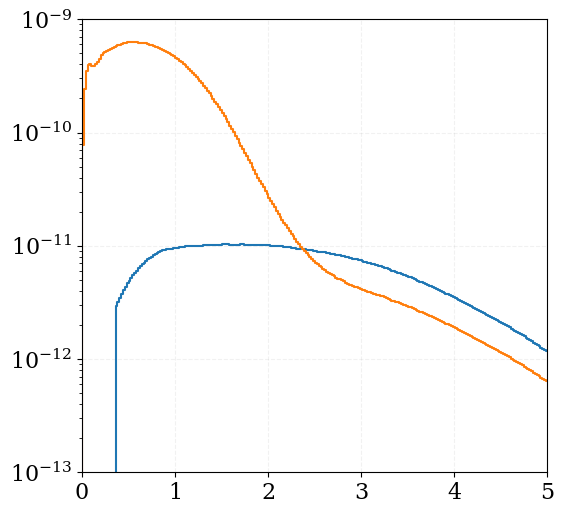

In [19]:
plt.figure(figsize=(6,6),facecolor='white',dpi=100)
plt.step(flux['bins'],flux['total'],color='C0')
plt.step(bnbFlux['bins'],bnbFlux['flux']['total_numu'],color='C1')
plt.grid(ls='--',color='C7',alpha=0.1)
plt.yscale('log')
plt.ylim(1e-13,1e-9)
plt.xlim(0,5)
plt.show()
